In [2]:
import pandas as pd
#from scipy import stats
import numpy as np
# import xlrd
# import os
# import scipy
# from sklearn.linear_model import LogisticRegression
# import matplotlib
# import statsmodels.api as sm

In [112]:
wcm=pd.read_table('/Users/yiyezhang/Documents/Data/NYPData/COVID19/order_per_day_WCM.csv',sep=',')
queens=pd.read_table('/Users/yiyezhang/Documents/Data/NYPData/COVID19/order_per_day_Queens.csv',sep=',')

/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.
/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [113]:
wcm['clientvisitguid']=wcm['clientvisitguid'].astype(int)
queens['clientvisitguid']=queens['clientvisitguid'].astype(int)

In [114]:
wcm['CreatedWhen'] = wcm['CreatedWhen'].astype('datetime64[h]')
queens['CreatedWhen'] = queens['CreatedWhen'].astype('datetime64[h]')

In [115]:
lmh=wcm[wcm['code'].str[0]=='L']
wcm=wcm[wcm['code'].str[0]!='L']

In [116]:
wcm_order=wcm[['clientvisitguid','CreatedWhen']]
lmh_order=lmh[['clientvisitguid','CreatedWhen']]
queens_order=queens[['clientvisitguid','CreatedWhen']]

In [117]:
wcm_order=wcm_order.drop_duplicates()
lmh_order=lmh_order.drop_duplicates()
queens_order=queens_order.drop_duplicates()

In [118]:
wcm_order.shape

(172, 2)

In [119]:
queens_order.shape

(35, 2)

In [120]:
lmh_order.shape

(27, 2)

In [121]:
wcm['date'] = pd.DatetimeIndex(wcm['CreatedWhen']).day
queens['date'] = pd.DatetimeIndex(queens['CreatedWhen']).day
lmh['date'] = pd.DatetimeIndex(lmh['CreatedWhen']).day

In [122]:
wcm.groupby(['date'])[['clientvisitguid']].count()

,clientvisitguid
date,
11,436
12,398
13,234
14,25


In [123]:
lmh.groupby(['date'])[['clientvisitguid']].count()

,clientvisitguid
date,
11,78
12,53
13,41
14,12


In [124]:
queens.groupby(['date'])[['clientvisitguid']].count()

,clientvisitguid
date,
12,18
13,90
14,14


In [293]:
visit=pd.read_table('/Users/yiyezhang/Documents/Data/NYPData/COVID19/clientvisit_all_WCM_LMH.csv',sep=',')

/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [295]:
visit.head()

,currentlocationfacility,observationvalue,mrn,LOS,admitdttm,dischargedttm,admitdate,dischargedate
0,NYP-WC,Pending,100035521,NaN,2020-03-13 18:46:00.0000000,NaN,2020-03-13,NaT
1,NYP-WC,Detected,89981416,4.0,2020-03-13 14:32:00.1000000,2020-03-17 14:46:00.1000500,2020-03-13,2020-03-17
2,NYP-WC,Pending,90000040,0.0,2020-03-17 08:06:00.1000000,2020-03-17 08:06:00.1000100,2020-03-17,2020-03-17
3,NYP-WC,Not Detected,2166311,0.0,2020-03-15 13:45:00.1007800,2020-03-15 13:45:00.1007900,2020-03-15,2020-03-15
4,NYP-WC,Not Detected,2878207,0.0,2020-03-15 11:47:00.1002200,2020-03-15 11:47:00.1002300,2020-03-15,2020-03-15


In [294]:
visit['admitdate'] = pd.DatetimeIndex(visit['admitdttm']).normalize()
visit['dischargedate'] = pd.DatetimeIndex(visit['dischargedttm']).normalize()

In [298]:
visit.groupby(['currentlocationfacility','admitdate'])['mrn'].count()

currentlocationfacility  admitdate 
NYP-LMH                  2020-03-08      1
                         2020-03-09      2
                         2020-03-10      1
                         2020-03-11      6
                         2020-03-12      4
                         2020-03-13      7
                         2020-03-14      7
                         2020-03-15     10
                         2020-03-16     12
                         2020-03-17     11
                         2020-03-18      1
NYP-WC                   2020-01-22      1
                         2020-02-12      1
                         2020-02-14      1
                         2020-02-15      1
                         2020-02-22      1
                         2020-02-28      1
                         2020-03-01      2
                         2020-03-02      2
                         2020-03-03      1
                         2020-03-04      2
                         2020-03-05      1
                  

In [203]:
lmh_visit=visit[visit['campus']=='L']
queens_visit=visit[visit['campus']=='E']
wcm_visit=visit[visit['campus']=='A']
visit['date'] = pd.DatetimeIndex(visit['CreatedWhen']).normalize()

In [276]:
visit.shape

(233, 6)

In [205]:
lmh_visit.shape

(65, 47)

In [206]:
queens_visit.shape

(128, 47)

In [208]:
wcm_visit['date'] = pd.DatetimeIndex(wcm_visit['CreatedWhen']).normalize()
queens_visit['date'] = pd.DatetimeIndex(queens_visit['CreatedWhen']).normalize()
lmh_visit['date'] = pd.DatetimeIndex(lmh_visit['CreatedWhen']).normalize()

/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [209]:
queens_visit[queens_visit['DischargeDtm'].isnull()==False]['GUID'].count()

42

In [210]:
lmh_visit[lmh_visit['DischargeDtm'].isnull()==False]['GUID'].count()

27

In [211]:
wcm_visit[wcm_visit['DischargeDtm'].isnull()==False]['GUID'].count()

110

In [213]:
visit.groupby(['campus','gendercode'])['age'].mean()

campus  gendercode
A       Female        54.502994
        Male          53.477273
        Unknown       53.000000
B       Male          20.000000
C       Female        44.000000
E       Female        62.698113
        Male          56.960000
L       Female        50.777778
        Male          57.026316
Name: age, dtype: float64

In [218]:
pip install tabulate

     |████████████████████████████████| 45 kB 1.3 MB/s eta 0:00:011
  Created wheel for tabulate: filename=tabulate-0.8.6-py3-none-any.whl size=23271 sha256=b8616dbfc656e8ffc2568d53edc1987628926b0a47ec8aae716575879bce56a3
  Stored in directory: /Users/yiyezhang/Library/Caches/pip/wheels/09/b6/7e/08b4ee715a1239453e89a59081f0ac369a9036f232e013ecd8
Successfully built tabulate
Note: you may need to restart the kernel to use updated packages.


In [220]:
visit.groupby(['campus','racecode'])['GUID'].count()

campus  racecode            
A       Am Indian/Alaska Nat      1
        Asian                    32
        Asian Indian              1
        B                         1
        Black/African Am.        51
        Chinese                   1
        Declined                 24
        Filipino                  1
        Other Not Described      44
        Unknown-Pt not Avail     55
        White                   134
B       Black/African Am.         1
C       White                     1
E       Am Indian/Alaska Nat      1
        Asian                    16
        Asian Indian              2
        Black/African Am.        12
        Chinese                   5
        Declined                  1
        Filipino                  4
        Korean                    1
        Other Not Described      46
        White                    40
L       Asian                    13
        Asian Indian              1
        Black/African Am.        17
        Declined                  5

In [230]:
from datetime import datetime
discharged=visit[visit['DischargeDtm'].isnull()==False]

In [233]:
discharged['AdmitDtm'] = discharged['AdmitDtm'].astype('datetime64[h]')
discharged['DischargeDtm'] = discharged['DischargeDtm'].astype('datetime64[h]')

/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [251]:
discharged['LOS']=(discharged['DischargeDtm']-discharged['AdmitDtm']).astype('timedelta64[h]')

/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [253]:
discharged.groupby(['campus'])['LOS'].mean()

campus
A    37.290909
E    26.380952
L    37.000000
Name: LOS, dtype: float64

In [261]:
discharged['DischargeDate'] = discharged['DischargeDtm'].astype('datetime64[D]')

/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [265]:
discharged

,SiteID,RepFlags,Build,TouchedBy,TouchedWhen,CreatedBy,CreatedWhen,Active,GUID,VisitStatus,...,PrivacyStatusGUID,JHash,JupiterImportRunID,racecode,gendercode,age,campus,date,LOS,DischargeDate
5,0,1,5503000,be4d3a03_interfaces,2020-03-13 14:36:58.133,be4d3a03_interfaces,2020-03-10 21:19:26.197,1,9001490105800270,DSC,...,9.000001e+15,a31985f154bed23a,220741,Other Not Described,Male,63,A,2020-03-10,47.0,2020-03-13
6,0,1,5503000,be4d3a03_interfaces,2020-03-13 14:37:35.253,be4d3a03_interfaces,2020-03-09 06:33:23.377,1,9001488987900270,DSC,...,9.000001e+15,dcc8aec0c0db7df1,220741,Declined,Male,90,A,2020-03-09,92.0,2020-03-13
7,0,1,5503000,be4d3a03_interfaces,2020-03-13 23:03:35.837,be4d3a03_interfaces,2020-03-11 15:26:28.640,1,9001490526800270,DSC,...,9.000001e+15,b745a13242158edf,220741,White,Female,48,A,2020-03-11,49.0,2020-03-13
8,0,1,5503000,be4d3a03_interfaces,2020-03-14 04:01:25.507,be4d3a03_interfaces,2020-03-13 21:42:04.993,1,9001491590600270,DSC,...,NaN,d4dea98ec518c7ac,220741,White,Male,37,A,2020-03-13,6.0,2020-03-14
9,0,1,5503000,be4d3a03_interfaces,2020-03-14 17:09:56.997,be4d3a03_interfaces,2020-03-12 23:13:03.637,1,9001491179100270,DSC,...,9.000001e+15,9dd2f0e6d3edf6fc,221122,Asian,Male,45,A,2020-03-12,39.0,2020-03-14
10,0,1,5503000,be4d3a03_interfaces,2020-03-14 19:05:25.390,be4d3a03_interfaces,2020-03-13 23:14:35.757,1,9001491594700270,DSC,...,NaN,f023d8b822e3e961,221122,Other Not Described,Male,34,L,2020-03-13,18.0,2020-03-14
11,0,1,5503000,be4d3a03_interfaces,2020-03-14 19:33:36.360,be4d3a03_interfaces,2020-03-14 15:00:46.347,1,9001491635600270,DSC,...,NaN,960156a63b7aefe0,221122,Other Not Described,Male,32,A,2020-03-14,4.0,2020-03-14
12,0,1,5503000,be4d3a03_interfaces,2020-03-14 19:46:16.203,be4d3a03_interfaces,2020-03-14 18:31:26.783,1,9001491653800270,DSC,...,NaN,be21497c95d76f4c,221122,Asian,Female,63,A,2020-03-14,1.0,2020-03-14
19,0,1,5503000,be4d3a03_interfaces,2020-03-11 20:11:59.120,be4d3a03_interfaces,2020-03-11 11:51:38.507,1,9001490342600270,DSC,...,9.000001e+15,63a85b722e7094be,219978,Black/African Am.,Male,33,L,2020-03-11,7.0,2020-03-11
20,0,1,5503000,be4d3a03_interfaces,2020-03-12 14:18:32.893,be4d3a03_interfaces,2020-03-10 16:59:48.637,1,9001490062500270,DSC,...,9.000001e+15,70320b1712cd764f,220323,White,Male,58,A,2020-03-10,38.0,2020-03-12


In [266]:
discharged.groupby(['campus','DischargeDate'])['age'].count()

campus  DischargeDate
A       2020-03-10        4
        2020-03-11        2
        2020-03-12       15
        2020-03-13       18
        2020-03-14       22
        2020-03-15       21
        2020-03-16       28
E       2020-03-13        6
        2020-03-14        9
        2020-03-15       15
        2020-03-16       11
        2020-03-17        1
L       2020-03-11        2
        2020-03-12        4
        2020-03-13        3
        2020-03-14        6
        2020-03-15        3
        2020-03-16        9
Name: age, dtype: int64

In [191]:
queens_visit.groupby(['DischargeDisposition'])['GUID'].count()

DischargeDisposition
Acute        1
Deceased     2
HOM         20
OTH          1
Routine     18
Name: GUID, dtype: int64

In [192]:
wcm_visit.groupby(['DischargeDisposition'])['GUID'].count()

DischargeDisposition
Acute                 1
Deceased              1
Disch/Home Health     1
Discharged SNF        1
Home or Self Care    57
Left AMA              2
Other                 2
Routine              44
Shelter               1
Name: GUID, dtype: int64

In [193]:
lmh_visit.groupby(['DischargeDisposition'])['GUID'].count()

DischargeDisposition
Disch/Home Health     1
Discharged SNF        1
Home or Self Care     9
Routine              16
Name: GUID, dtype: int64

In [196]:
lmh_visit.groupby(['racecode','gendercode'])['GUID'].count()

racecode              gendercode
Asian                 Female         5
                      Male           8
Asian Indian          Male           1
Black/African Am.     Female         7
                      Male          10
Declined              Female         3
                      Male           2
Other Not Described   Female         4
                      Male           9
Unknown-Pt not Avail  Female         2
                      Male           2
White                 Female         6
                      Male           6
Name: GUID, dtype: int64

In [197]:
wcm_visit.groupby(['racecode','gendercode'])['GUID'].count()

racecode              gendercode
Am Indian/Alaska Nat  Female         1
Asian                 Female        14
                      Male          18
Asian Indian          Male           1
B                     Female         1
Black/African Am.     Female        26
                      Male          26
Chinese               Female         1
Declined              Female        10
                      Male          14
Filipino              Female         1
Other Not Described   Female        24
                      Male          20
Unknown-Pt not Avail  Female        24
                      Male          29
                      Unknown        2
White                 Female        66
                      Male          69
Name: GUID, dtype: int64

In [198]:
queens_visit.groupby(['racecode','gendercode'])['GUID'].count()

racecode              gendercode
Am Indian/Alaska Nat  Female         1
Asian                 Female         7
                      Male           9
Asian Indian          Female         1
                      Male           1
Black/African Am.     Female         7
                      Male           5
Chinese               Female         3
                      Male           2
Declined              Male           1
Filipino              Female         2
                      Male           2
Korean                Male           1
Other Not Described   Female        15
                      Male          31
White                 Female        17
                      Male          23
Name: GUID, dtype: int64

In [221]:
testing=pd.read_table('/Users/yiyezhang/Documents/Data/NYPData/COVID19/testing_WCM_Queesn_LMH.csv',sep=',')

/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [222]:
testing['date'] = pd.DatetimeIndex(testing['CreatedWhen']).normalize()

In [227]:
testing.groupby(['campus','date'])['clientvisitguid'].count()

campus  date      
A       2020-03-11    59
        2020-03-12    84
        2020-03-13    56
        2020-03-14    74
        2020-03-15    41
        2020-03-16    94
        2020-03-17    12
B       2020-03-15     2
C       2020-03-16     1
E       2020-03-12     4
        2020-03-13    26
        2020-03-14    39
        2020-03-15    59
        2020-03-16    50
        2020-03-17     8
L       2020-03-11    14
        2020-03-12    13
        2020-03-13     8
        2020-03-14    13
        2020-03-15    11
        2020-03-16    20
        2020-03-17     1
Name: clientvisitguid, dtype: int64

In [225]:
testing.head()

,clientvisitguid,CreatedWhen,campus,date
0,9001491561900270,2020-03-13 18:17:57.890,A,2020-03-13
1,9001491736900270,2020-03-16 05:49:55.597,A,2020-03-16
2,9001491898700270,2020-03-16 13:00:11.460,A,2020-03-16
3,9001491929200270,2020-03-16 16:07:13.160,A,2020-03-16
4,9001489527300270,2020-03-12 15:54:58.680,A,2020-03-12


##VENTILATOR

In [709]:
vent_all=pd.read_table('/Users/yiyezhang/Documents/Data/NYPData/COVID19/ventilator_status_east_all.csv',sep=',')

/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [692]:
vent_all.shape

(11166, 21)

In [710]:
vent_all.head()

,VentilationType,PatientID,VisitID,EMPI,FacilityID,StartDtTm,EndDtTm,CurrentLocationUnit,ObservationValue,AdmitComplaint,...,DOB,admitdttm,hourafteradmission,race,sex,unitHL7code,CampusShort,unitcode,ICU,RN
0,HFNC,14970314.0,29985443,1203344670,A,2020-03-17 14:15:00.0000000,NaN,G06W,NaN,NaN,...,2019-10-18 00:00:00.000,NaN,3637,A,F,G06W,NYP-WC,G06W,1.0,1
1,Oxygen,157584.0,31126980,1005530571,A,2020-03-19 00:09:00.0000000,NaN,G08S,NaN,ABD PAIN,...,1951-08-26 00:00:00.000,NaN,2290,D,F,NaN,NYP-WC,G08S,NaN,1
2,Oxygen,4406871.0,32000149,1007573041,A,2020-02-20 17:56:00.0000000,NaN,4C,NaN,WEAKNESS,...,1972-06-05 00:00:00.000,NaN,511,D,M,NaN,NYP-LMH,4C,NaN,1
3,Oxygen,9422774.0,32187502,1005467536,A,2020-03-16 07:37:00.0000000,NaN,G11N,NaN,PSYCH EVAL,...,1958-04-16 00:00:00.000,NaN,762,W,M,NaN,NYP-WC,G11N,NaN,1
4,Invasive,14817911.0,32259736,1201634257,A,2020-03-19 04:42:00.0000000,NaN,G08S,NaN,NaN,...,1971-09-24 00:00:00.000,NaN,237,A,M,NaN,NYP-WC,G08S,NaN,1


In [694]:
vent_all['VisitID'].nunique()

11166

In [695]:
vent_all['date'] = pd.DatetimeIndex(vent_all['StartDtTm']).normalize()

In [696]:
vent_all['DOB']=pd.to_datetime(vent_all['DOB'])

In [697]:
vent_all['age']=(datetime.datetime.now()-vent_all['DOB']).astype('timedelta64[Y]')

In [698]:
vent_all['agecat']=''
age022 = (vent_all['age']>=0) & (vent_all['age']<22)
age2249 = (vent_all['age']>=21) & (vent_all['age']<50)
age5064 = (vent_all['age']>=50) & (vent_all['age']<65)
age65 = (vent_all['age']>=65)
vent_all['agecat'][age022] = '0_21'
vent_all['agecat'][age2249] = '22_49'
vent_all['agecat'][age5064] = '50_64'
vent_all['agecat'][age65] = '65+'

/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarn

In [699]:
#vent_all=vent_all[vent_all['date'] > '2020-03-01']

In [700]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [701]:
pd.set_option('display.max_rows', 100)
vent_agecat_perday_LMH=vent_all[vent_all['CampusShort']=='NYP-LMH'].groupby(['date','agecat']).count()['EMPI'].unstack()
vent_perday_LMH=vent_all[vent_all['CampusShort']=='NYP-LMH'].groupby(['date'])['EMPI'].nunique()
vent_agecat_perday_WCM=vent_all[vent_all['CampusShort']=='NYP-WC'].groupby(['date','agecat']).count()['EMPI'].unstack()
vent_perday_WCM=vent_all[vent_all['CampusShort']=='NYP-WC'].groupby(['date'])['EMPI'].nunique()

In [702]:
icu=vent_all[vent_all['ICU']==1]

In [703]:
import matplotlib.pyplot as plt

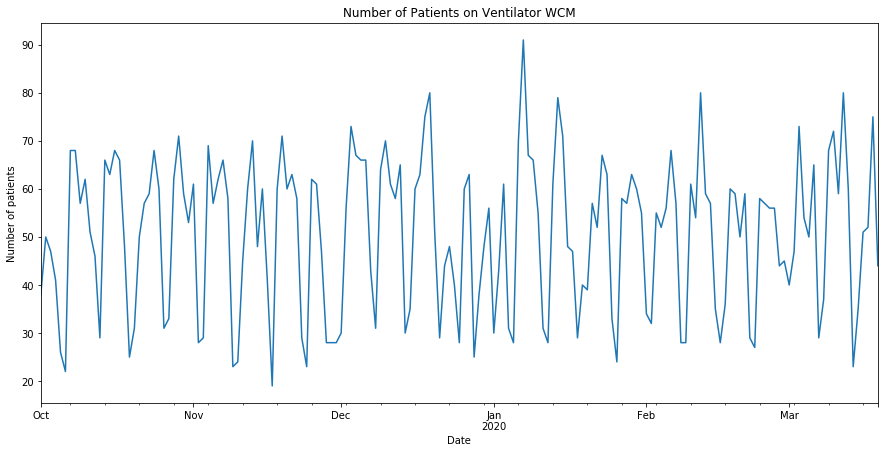

In [719]:
fig, ax = plt.subplots(figsize=(15,7))
vent_perday_WCM.plot(ax=ax)
plt.title("Number of Patients on Ventilator WCM")
ax.set_xlabel("Date")
ax.set_ylabel("Number of patients")
plt.savefig('NPt_WCM_sinceOct2019.png', bbox_inches='tight')

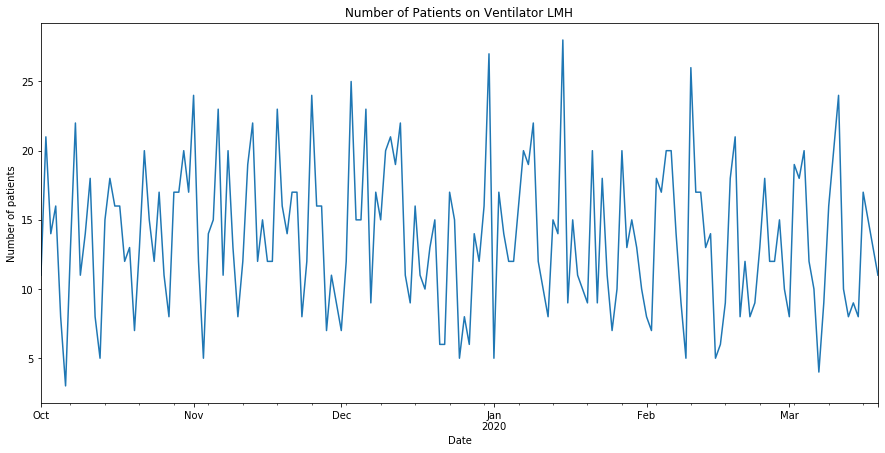

In [705]:
fig, ax = plt.subplots(figsize=(15,7))
vent_perday_LMH.plot(ax=ax)
plt.title("Number of Patients on Ventilator LMH")
ax.set_xlabel("Date")
ax.set_ylabel("Number of patients")
plt.savefig('NPt_LMH_sinceOct2019.png', bbox_inches='tight')

In [706]:
vent_agecat_perday_LMH.head(10)

agecat,0_21,22_49,50_64,65+
date,,,,
2019-10-01,NaN,9.0,2.0,NaN
2019-10-02,NaN,16.0,NaN,5.0
2019-10-03,NaN,9.0,3.0,2.0
2019-10-04,NaN,12.0,2.0,2.0
2019-10-05,1.0,4.0,1.0,2.0
2019-10-06,NaN,3.0,NaN,NaN
2019-10-07,NaN,8.0,2.0,3.0
2019-10-08,NaN,12.0,5.0,5.0
2019-10-09,NaN,7.0,1.0,3.0


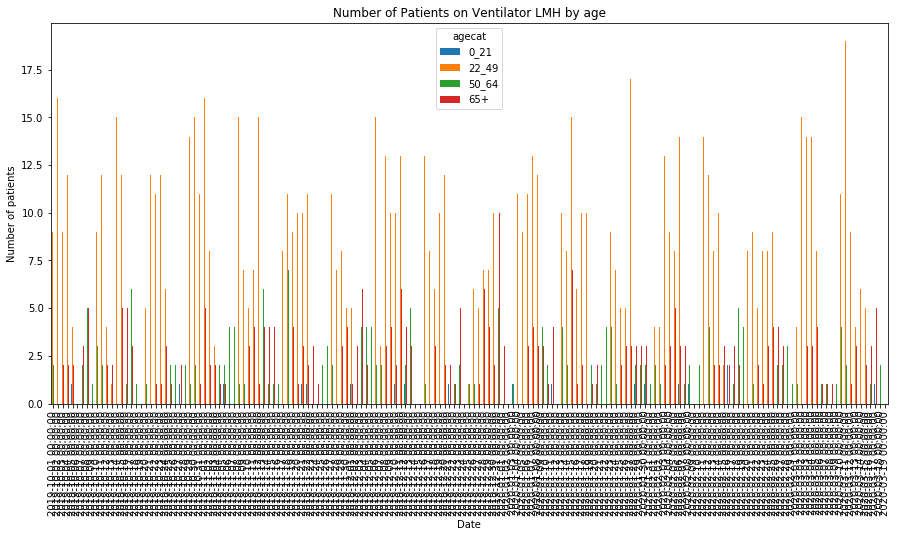

In [720]:
fig,ax = plt.subplots(figsize=(15,7))
vent_agecat_perday_LMH.plot.bar(ax=ax,rot=90)
# vent_agecat_perday_LMH.plot(ax=ax)
plt.title("Number of Patients on Ventilator LMH by age")
ax.set_xlabel("Date")
ax.set_ylabel("Number of patients")
plt.savefig('NPt_LMH_byage_sinceOct2019.png', bbox_inches='tight')

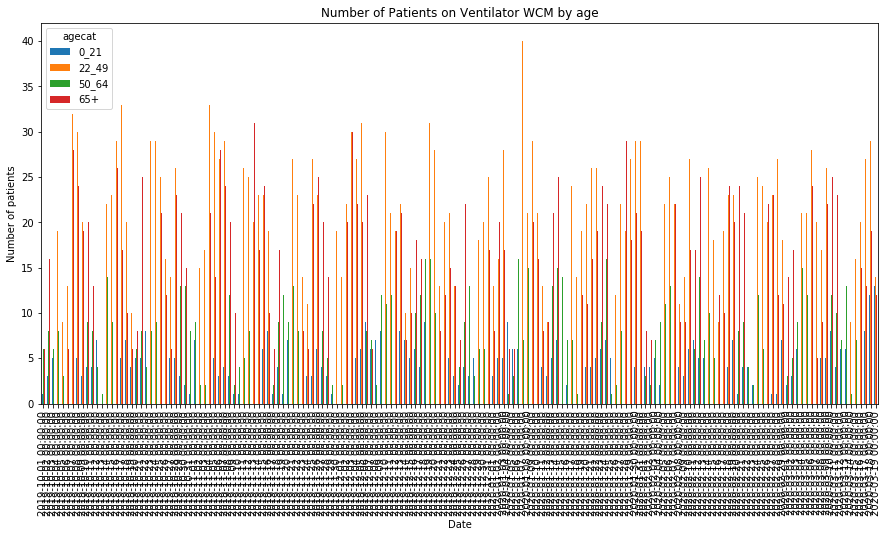

In [708]:
fig,ax = plt.subplots(figsize=(15,7))
vent_agecat_perday_WCM.plot.bar(ax=ax,rot=90)
# vent_agecat_perday_LMH.plot(ax=ax)
plt.title("Number of Patients on Ventilator WCM by age")
ax.set_xlabel("Date")
ax.set_ylabel("Number of patients")
plt.savefig('NPt_WCM_byage_sinceOct2019.png', bbox_inches='tight')

In [299]:
vent=pd.read_table('/Users/yiyezhang/Documents/Data/NYPData/COVID19/ventilator_status_east.csv',sep=',')

/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [302]:
vent['date'] = pd.DatetimeIndex(vent['admitdttm']).normalize()

In [315]:
vent['DOB']=pd.to_datetime(vent['DOB'])

In [320]:
vent['age']=(datetime.datetime.now()-vent['DOB']).astype('timedelta64[Y]')

In [346]:
vent['agecat']=''
age022 = (vent['age']>=0) & (vent['age']<22)
age2249 = (vent['age']>=21) & (vent['age']<50)
age5064 = (vent['age']>=50) & (vent['age']<65)
age65 = (vent['age']>=65)
vent['agecat'][age021] = '0_21'
vent['agecat'][age2249] = '22_49'
vent['agecat'][age5064] = '50_64'
vent['agecat'][age65] = '65'

/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarn

In [326]:
type(vent['age'][0])

numpy.float64

In [410]:
vent.groupby(['CampusShort','date'])['EMPI'].count()

CampusShort  date      
NYP-LMH      2020-03-14     1
             2020-03-15     1
             2020-03-16     1
             2020-03-17     8
             2020-03-18     2
NYP-WC       2020-02-19     1
             2020-02-29     1
             2020-03-04     1
             2020-03-06     1
             2020-03-08     1
             2020-03-12     5
             2020-03-13     2
             2020-03-14     4
             2020-03-15     3
             2020-03-16     5
             2020-03-17    11
             2020-03-18    18
Name: EMPI, dtype: int64

In [347]:
vent_all['agecat'].count()

KeyError: 'agecat'

In [340]:
vent.head()

,VentilationType,PatientID,VisitID,EMPI,FacilityID,StartDtTm,EndDtTm,CurrentLocationUnit,ObservationValue,AdmitComplaint,DOB,admitdttm,race,sex,CampusShort,RN,date,age,agecat
0,Oxygen,3639621,31807528,1009271946,A,2020-02-12 17:06:00.0000000,NaN,G04C,Pending,NaN,1948-09-18,2020-02-19 17:37:00.1000400,A,M,NYP-WC,1,2020-02-19,71.0,65
1,Oxygen,14808272,32179476,1201621287,A,2020-03-05 12:26:00.0000000,NaN,G05C,Not Detected,TACHYCARDIA AFTER DIALYSIS,1942-11-21,2020-03-16 23:55:00.1001600,B,M,NYP-WC,1,2020-03-16,77.0,65
2,HFNC,971258,32334908,1006575010,A,2020-03-18 09:38:00.0000000,NaN,G04W,Not Detected,CHEST PAIN,1951-05-06,2020-02-29 16:35:00.1002200,D,M,NYP-WC,1,2020-02-29,68.0,65
3,Invasive,4770924,32342477,1200362603,A,2020-03-18 18:36:00.0000000,NaN,G04S,Not Detected,AMS,1958-07-30,2020-03-16 19:49:00.1001300,B,M,NYP-WC,1,2020-03-16,61.0,50_64
4,Invasive,4362602,32345709,1103435353,A,2020-03-18 15:57:00.0000000,NaN,G08S,Not Detected,FEVER; ABD PAIN,1991-02-18,2020-03-08 22:01:00.1013900,O,F,NYP-WC,1,2020-03-08,29.0,22_49


In [711]:
import pymssql
connection=pymssql.connect(server='DRTUAT01JUP01.sis.nyp.org',user=r'NYH\yiz2014',password='*')

/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  """Entry point for launching an IPython kernel.


In [716]:
cur = connection.cursor() 
cur.execute("SELECT dayofarrival,count(pid)FROM(SELECT DISTINCT cv.guid AS pid,cast(cv.admitdtm AS date)AS dayofarrival FROM jupiterscm.east.cv3clientvisit cv INNER JOIN jupiterscm.east.CV3ClientVisitLocation c ON c.clientvisitguid=cv.guid INNER JOIN JupiterSCM.east.CV3Location l ON c.LocationGUID=l.GUID WHERE cv.admitdtm>'2020-03-01' AND cv.typecode='Emergency Room' AND l.name!='EMERGENCY TELEHEALTH' UNION SELECT DISTINCT clientvisitguid AS pid,cast(EDarrivaldtm AS date)AS dayofarrival FROM dashboards.ed.ed WHERE EDarrivaldtm>'2020-03-01')a GROUP BY dayofarrival ORDER BY dayofarrival")
EDarrival = cur.fetchall() #need to add provider roles
print (EDarrival)

[(datetime.date(2020, 3, 1), 318), (datetime.date(2020, 3, 2), 363), (datetime.date(2020, 3, 3), 310), (datetime.date(2020, 3, 4), 379), (datetime.date(2020, 3, 5), 321), (datetime.date(2020, 3, 6), 327), (datetime.date(2020, 3, 7), 277), (datetime.date(2020, 3, 8), 224), (datetime.date(2020, 3, 9), 319), (datetime.date(2020, 3, 10), 359), (datetime.date(2020, 3, 11), 356), (datetime.date(2020, 3, 12), 363), (datetime.date(2020, 3, 13), 318), (datetime.date(2020, 3, 14), 50)]


In [718]:
pd.DataFrame(EDarrival,columns = ['Date' , 'Number of Patients']) 

,Date,Number of Patients
0,2020-03-01,318
1,2020-03-02,363
2,2020-03-03,310
3,2020-03-04,379
4,2020-03-05,321
5,2020-03-06,327
6,2020-03-07,277
7,2020-03-08,224
8,2020-03-09,319
9,2020-03-10,359


In [34]:
wcm=pd.read_table('/Users/yiyezhang/Documents/Data/covidpatientflow.csv',sep=',',names=["account","results","edsite","edarrivaldate","facilityID","department","division","dischargedtm","locationstart","locationend","expired"])

In [35]:
wcm = wcm.iloc[1:]

In [52]:
wcm['edarrivaldate'] = wcm['edarrivaldate'].astype('datetime64')
wcm['locationstart'] = wcm['locationstart'].astype('datetime64')
wcm['locationend'] = wcm['locationend'].astype('datetime64')
wcm['dischargedtm'] = wcm['locationend'].astype('datetime64')

In [37]:
wcm.iloc[2]['locationend']

Timestamp('2020-03-14 11:17:00')

In [38]:
wcm[wcm['account']=='422781911']

,account,results,edsite,edarrivaldate,facilityID,department,division,dischargedtm,locationstart,locationend,expired
1,422781911,Not Detected,NYP-WC z Enroute 1,2020-03-10 11:16:00,WCMC,Medicine,Cardiology,2020-03-17 16:36:00.0000000,2020-03-10 19:30:00,NaT,0


In [53]:
process={}
for res in wcm.itertuples():
    process[res.account]={}
    process[res.account]['campus']=res.facilityID
    process[res.account]['results']=res.results
    process[res.account]['flow']={}
    process[res.account]['flow'][res.edarrivaldate]=res.edsite

In [54]:
for pid in process:
    for res in wcm.itertuples():
        if pd.isna(res.division)==False:
            process[res.account]['flow'][res.locationstart]=res.division
        else:
            process[res.account]['flow'][res.locationstart]='Dept'+res.department

In [55]:
for pid in process:
    maxdate=max(sorted(process[pid]['flow']))
    for res in wcm.itertuples():
        if res.account==pid and res.locationstart==maxdate:
            if pd.isna(res.locationend)==True and pd.isna(res.dischargedtm)==True and res.expired=='0':
                process[res.account]['flow'][res.locationstart]='Active'
            elif pd.isna(res.locationend)==False and pd.isna(res.dischargedtm)==True and res.expired=='0':
                process[res.account]['flow'][res.locationstart]='Active'
            elif pd.isna(res.locationend)==False and pd.isna(res.dischargedtm)==False and res.expired=='0':
                process[res.account]['flow'][res.dischargedtm]='Discharged'
            elif pd.isna(res.locationend)==True and pd.isna(res.dischargedtm)==False and res.expired=='0':
                process[res.account]['flow'][res.dischargedtm]='Discharged'
            elif pd.isna(res.locationend)==True and pd.isna(res.dischargedtm)==False and res.expired=='1':
                process[res.account]['flow'][res.dischargedtm]='Deceased'
            elif pd.isna(res.locationend)==True and pd.isna(res.dischargedtm)==True and res.expired=='1':
                process[res.account]['flow'][res.dischargedtm]='Deceased'
            elif pd.isna(res.locationend)==False and pd.isna(res.dischargedtm)==False and res.expired=='1':
                process[res.account]['flow'][res.dischargedtm]='Deceased'
            
            else:
                print('nope',res)
print(process['422781911'])

{'campus': 'WCMC', 'results': 'Not Detected', 'flow': {Timestamp('2020-03-10 11:16:00'): 'NYP-WC z Enroute 1', Timestamp('2020-03-10 19:30:00'): 'Active'}}


In [56]:
import csv
with open('makecsv_process.csv', "w") as csv_file:
            writer = csv.writer(csv_file, delimiter=',')
            combined_row = []
            combined_row.append('account')
            combined_row.append('datetime')
            combined_row.append('location')
            combined_row.append('campus')
            combined_row.append('results')
            writer.writerow(combined_row)
            for pid in process:
                for date in sorted(process[pid]['flow']):
                    combined_row = []
                    combined_row.append(pid)
                    combined_row.append(date)
                    combined_row.append(process[pid]['flow'][date])
                    combined_row.append(process[pid]['campus'])
                    combined_row.append(process[pid]['results'])
                    writer.writerow(combined_row)

dict_keys([Timestamp('2020-03-10 11:16:00'), Timestamp('2020-03-10 19:30:00')])
dict_keys([Timestamp('2020-03-10 11:25:00'), Timestamp('2020-03-10 23:10:00'), Timestamp('2020-03-13 10:07:00'), Timestamp('2020-03-14 11:18:00')])
dict_keys([Timestamp('2020-03-10 11:39:00'), Timestamp('2020-03-10 15:56:00'), Timestamp('2020-03-16 11:20:00')])
dict_keys([Timestamp('2020-03-10 11:52:00'), Timestamp('2020-03-10 18:13:00'), Timestamp('2020-03-14 11:02:00'), Timestamp('2020-03-16 06:56:00')])
dict_keys([Timestamp('2020-03-10 12:28:00'), Timestamp('2020-03-10 17:49:00'), Timestamp('2020-03-22 12:42:00')])
dict_keys([Timestamp('2020-03-10 12:56:00'), Timestamp('2020-03-10 17:15:00'), Timestamp('2020-03-16 14:09:00'), Timestamp('2020-03-18 11:31:00')])
dict_keys([Timestamp('2020-03-10 13:07:00'), Timestamp('2020-03-10 21:39:00'), Timestamp('2020-03-14 12:35:00'), Timestamp('2020-03-16 08:11:00')])
dict_keys([Timestamp('2020-03-10 13:17:00'), Timestamp('2020-03-10 18:58:00'), Timestamp('2020-03-11